In [1]:
import warnings
warnings.simplefilter(action='ignore',)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from qiskit import Aer, BasicAer, QuantumCircuit, execute
backend = BasicAer.get_backend("qasm_simulator")
sim = Aer.get_backend("aer_simulator")

from qiskit.visualization import plot_histogram, plot_bloch_multivector

$|23\rangle = |10111\rangle$

Note that the first qubit of qiskit's circuit is the last qubit of binary string.

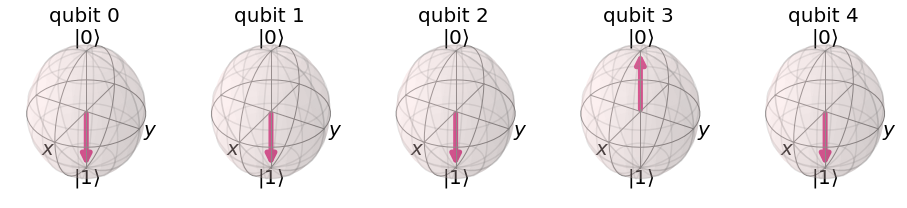

In [2]:
qc = QuantumCircuit(5)

qc.x([0,1,2,4])

qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

### QFT

In [3]:
def phase_rotate(circuit, n):  
    if n == 0: return circuit
    
    n = n-1
    circuit.h(n)
    
    for qubit in range(n): circuit.cp(np.pi/2**(n-qubit), qubit, n)     
    phase_rotate(circuit, n)

In [4]:
def swap_registers(circuit, n):    
    for qubit in range(n//2): circuit.swap(qubit, n-qubit-1)

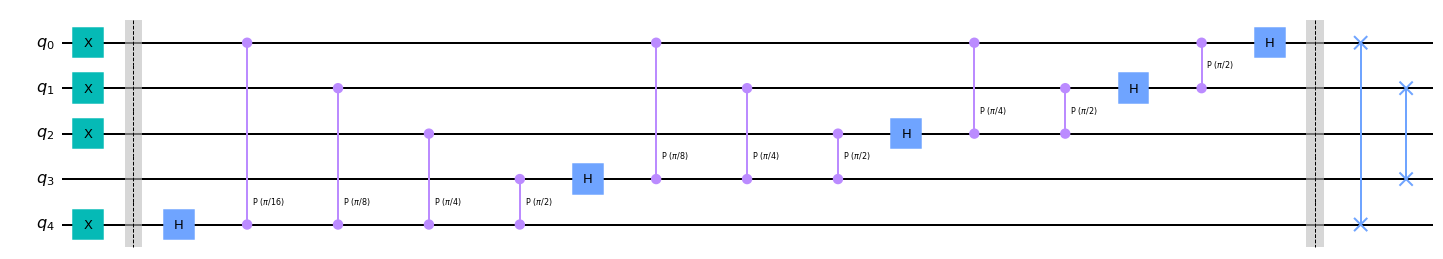

In [5]:
N = 5

qc = QuantumCircuit(N)

qc.x([0,1,2,4])
qc.barrier()

phase_rotate(qc,N)
qc.barrier()

swap_registers(qc,N)
qc.draw(output="mpl", fold=-1)

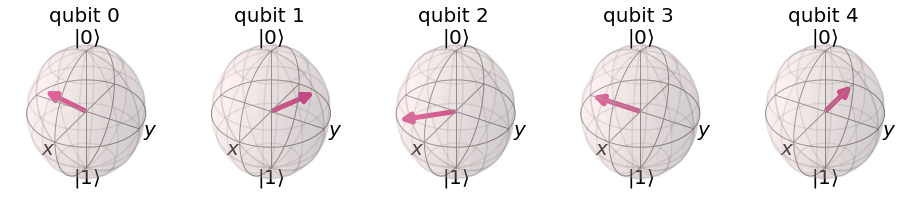

In [6]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

### QFT$^\dagger$

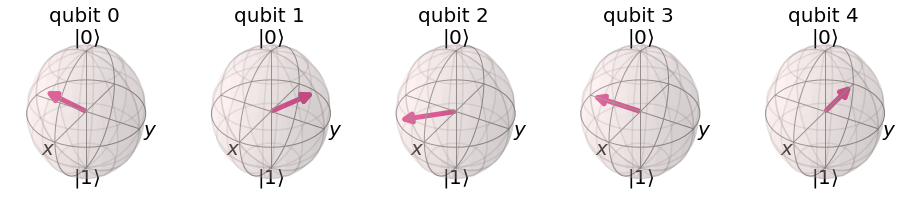

In [7]:
QUBITS = 5
OBJECT = 23

qc = QuantumCircuit(QUBITS)
qc.h(range(QUBITS))
for i in range(QUBITS): qc.p(OBJECT*np.pi/(2**i),QUBITS-i-1)
    
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

In [8]:
def qft_dagger(circuit, n): 
    qc = QuantumCircuit(n)
    phase_rotate(qc,n)
    swap_registers(qc,n)
    
    qc_dagger = qc.inverse()
    qft_dagger = qc_dagger.to_gate()
    qft_dagger.name = " QFT$^\dagger$ "
    circuit.append(qft_dagger, range(n))

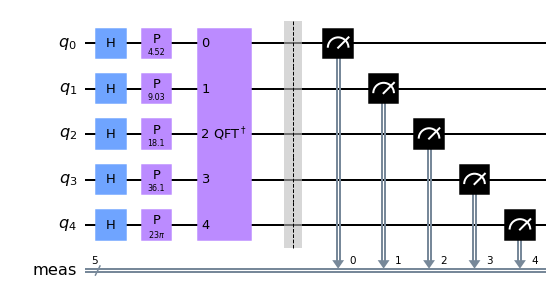

In [9]:
QUBITS = 5
OBJECT = 23

qc = QuantumCircuit(QUBITS)
qc.h(range(QUBITS))
for i in range(QUBITS): qc.p(OBJECT*np.pi/(2**i),QUBITS-i-1)
qft_dagger(qc, QUBITS)
qc.measure_all()
qc.draw(output="mpl")

In [10]:
result = execute(qc, backend=backend,shots=1024).result()
result.get_counts()

{'10111': 1024}